In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import base64
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import gc



fossilFuel = pd.read_csv(".\Fossil Fuel\API_EG.ELC.FOSL.ZS_DS2_en_csv_v2_5454982.csv")
globalUse = pd.read_csv(".\Global electrical use\API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_5455020.csv")
nuclear = pd.read_csv("./Nuclear\API_EG.ELC.NUCL.ZS_DS2_en_csv_v2_5454969.csv")
renewable = pd.read_csv(".\Renewable sin hydro\API_EG.ELC.RNWX.KH_DS2_en_csv_v2_5454961.csv")

In [2]:
sets = {'fossilFuel':fossilFuel,'globalUse':globalUse,'nuclear':nuclear,'renewable':renewable}

 A number of NaN values in fossilFuel is 8959 
 A number of NaN values in globalUse is 9234 
 A number of NaN values in nuclear is 9086 
 A number of NaN values in renewable is 8664 


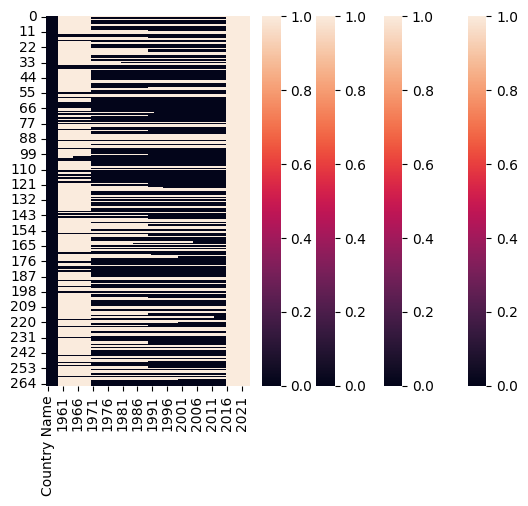

In [3]:
def miss_values_check(data,n):
    print(f'\033[0;33;40m A number of NaN values in {n} is {data.isnull().sum().sum()} \033[0;30;0m')
    if data.isnull().sum().sum() >0:
        sns.heatmap(data.isnull())
for n in sets:
    miss_values_check(sets[n],n)

In [4]:
for n in sets:
    sets[n] = sets[n].fillna(0)

In [5]:
for n in sets:
    print(sets[n].columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', 

In [6]:
for n in sets:
    sets[n] = sets[n].drop(['Indicator Name','Indicator Code','2022','2021','2020','2019','2018','2017','2016','Unnamed: 67'], axis=1)

In [7]:
for n in sets:
    print(sets[n].columns)

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')
Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006'

In [9]:
for n in sets:
    print(sets[n].count()[0])

266
266
266
266
